# Toric codes

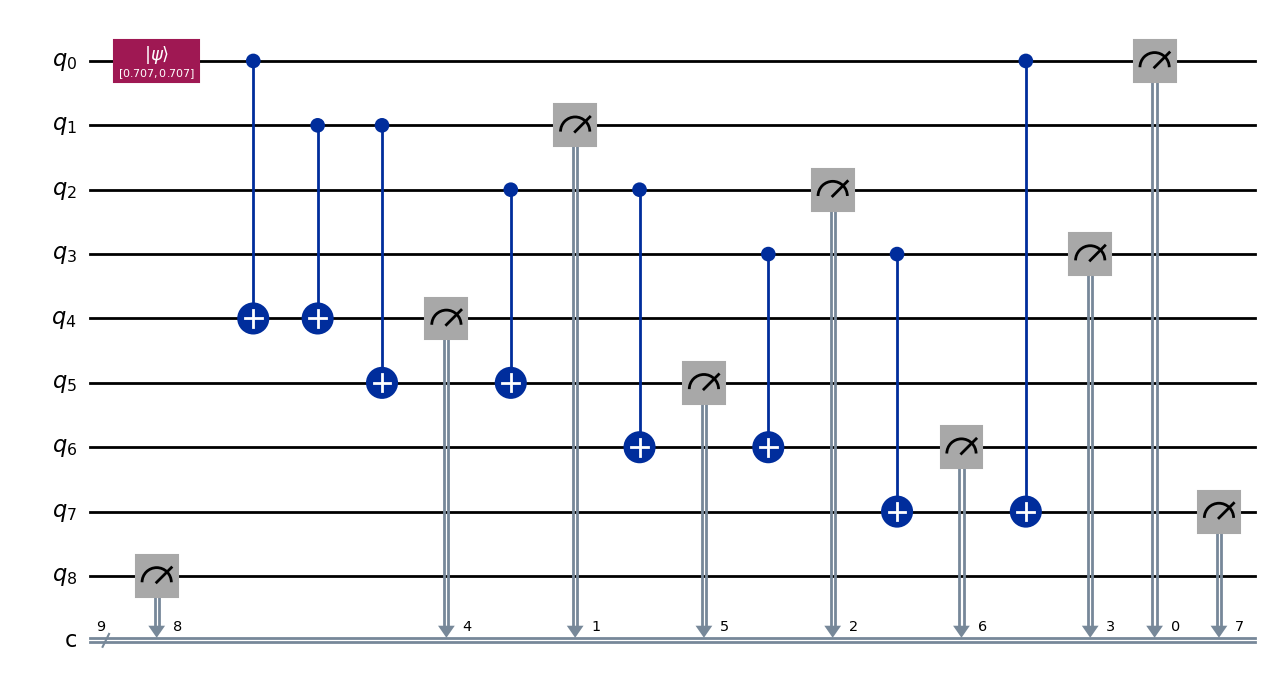


Measurement Results:  {'000000000': 501, '010010001': 523}


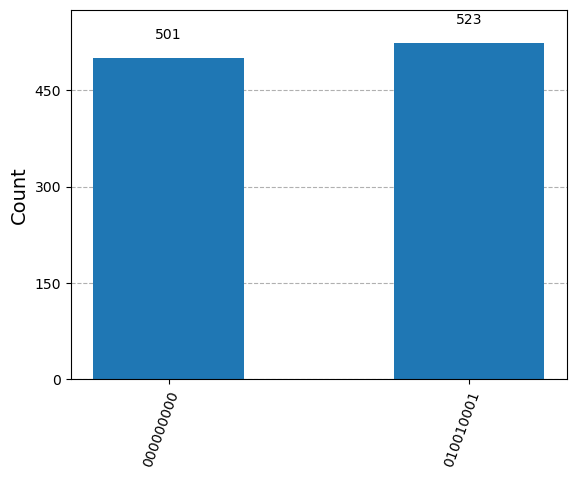

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

def encode_toric_code(initial_state):
    """
    Encodes a single qubit state into a toric code.
    
    Parameters:
        initial_state (tuple): A tuple representing the initial state to encode (alpha, beta) for alpha|0> + beta|1>
    """
    alpha, beta = initial_state

    # Create a quantum circuit with 9 qubits (4 data qubits, 5 ancillary qubits)
    qc = QuantumCircuit(9, 9)

    # Encode the initial state into the first qubit
    qc.initialize([alpha, beta], 0)
    
    # Apply CNOTs for stabilizer checks (simplified for demonstration)
    # The following operations are based on a simple 2x2 toric code
    # Create a small 2x2 toric code lattice

    # Stabilizers for plaquettes (apply CNOTs)
    qc.cx(0, 4)  # X stabilizer
    qc.cx(1, 4)
    qc.cx(1, 5)  # X stabilizer
    qc.cx(2, 5)
    qc.cx(2, 6)  # X stabilizer
    qc.cx(3, 6)
    qc.cx(3, 7)  # X stabilizer
    qc.cx(0, 7)

    # Measure the stabilizers (for demonstration, in practice these would be ancillary qubits)
    qc.measure(range(9), range(9))

    return qc

# Define the initial state to encode (e.g., |ψ> = α|0> + β|1>)
alpha = 1 / np.sqrt(2)
beta = 1 / np.sqrt(2)
initial_state = (alpha, beta)

# Encode the state using the toric code
qc = encode_toric_code(initial_state)

# Display the circuit
circuit_draw = qc.draw(output='mpl')
display(circuit_draw)

# Execute the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print("\nMeasurement Results: ", counts)

# Plot the results
histogram = plot_histogram(counts)
display(histogram)


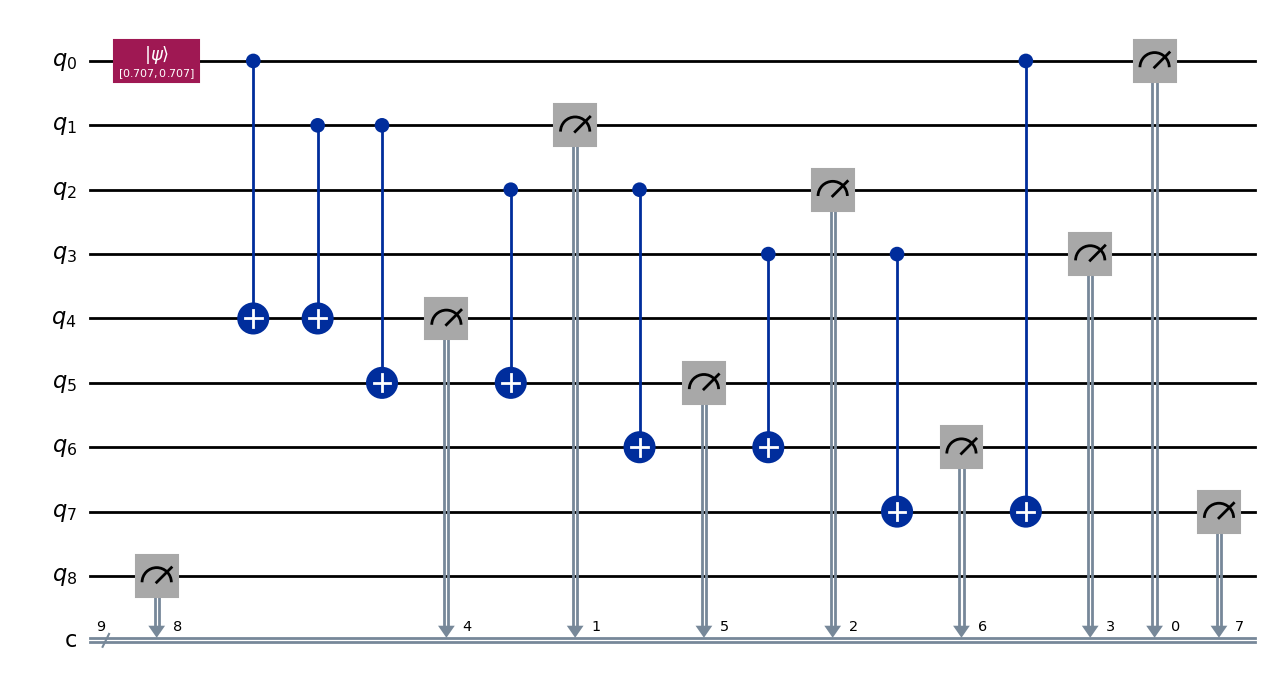


Measurement Results:  {'010010001': 502, '000000000': 522}

Corrected Measurement Results:  {'100010001': 502, '000000000': 522}


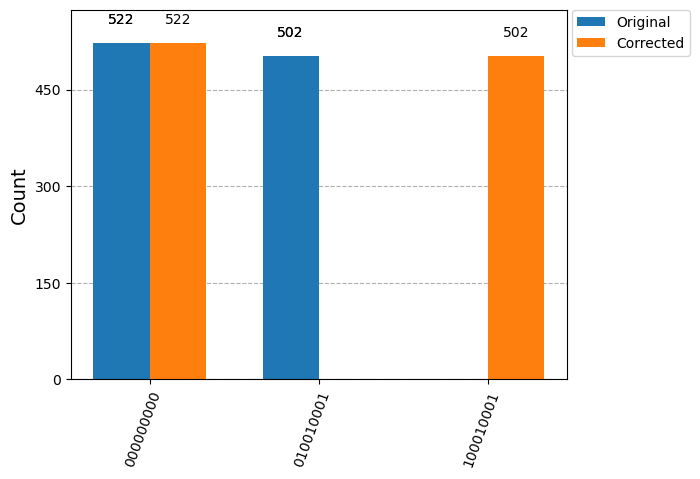

In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

def encode_toric_code(initial_state):
    """
    Encodes a single qubit state into a toric code.
    
    Parameters:
        initial_state (tuple): A tuple representing the initial state to encode (alpha, beta) for alpha|0> + beta|1>
    """
    alpha, beta = initial_state

    # Create a quantum circuit with 9 qubits (4 data qubits, 5 ancillary qubits)
    qc = QuantumCircuit(9, 9)

    # Encode the initial state into the first qubit
    qc.initialize([alpha, beta], 0)
    
    # Apply CNOTs for stabilizer checks (simplified for demonstration)
    # The following operations are based on a simple 2x2 toric code
    # Create a small 2x2 toric code lattice

    # Stabilizers for plaquettes (apply CNOTs)
    qc.cx(0, 4)  # X stabilizer
    qc.cx(1, 4)
    qc.cx(1, 5)  # X stabilizer
    qc.cx(2, 5)
    qc.cx(2, 6)  # X stabilizer
    qc.cx(3, 6)
    qc.cx(3, 7)  # X stabilizer
    qc.cx(0, 7)

    # Measure the stabilizers (for demonstration, in practice these would be ancillary qubits)
    qc.measure(range(9), range(9))

    return qc

def decode_toric_code(measurements):
    """
    Decodes the measurement results of the toric code.
    
    Parameters:
        measurements (dict): A dictionary of measurement results.
    
    Returns:
        dict: The corrected measurement results.
    """
    corrected_measurements = {}
    for key, value in measurements.items():
        # Decode the errors and correct them (simplified for demonstration)
        # In practice, you would use a more sophisticated error correction algorithm
        corrected_key = list(key)
        if key[4] != key[0]:
            corrected_key[0] = key[4]
        if key[5] != key[1]:
            corrected_key[1] = key[5]
        if key[6] != key[2]:
            corrected_key[2] = key[6]
        if key[7] != key[3]:
            corrected_key[3] = key[7]
        corrected_key = ''.join(corrected_key)
        corrected_measurements[corrected_key] = value
    
    return corrected_measurements

# Define the initial state to encode (e.g., |ψ> = α|0> + β|1>)
alpha = 1 / np.sqrt(2)
beta = 1 / np.sqrt(2)
initial_state = (alpha, beta)

# Encode the state using the toric code
qc = encode_toric_code(initial_state)

# Display the circuit
circuit_draw = qc.draw(output='mpl')
display(circuit_draw)

# Execute the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print("\nMeasurement Results: ", counts)

# Decode the results
corrected_counts = decode_toric_code(counts)
print("\nCorrected Measurement Results: ", corrected_counts)

# Plot the original and corrected results
histogram = plot_histogram([counts, corrected_counts], legend=['Original', 'Corrected'])
display(histogram)
